**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Primer Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Corto:** 02

**Datos de la entrega:** Viernes 16 de abril 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Luis Adrián Badilla Godínez
- Jorge Eduardo Gutiérrez Mata





# Parte 1.  Series temporales y graficación

Se le suministra un archivo llamado monthly-sunspots2.csv.  Utilizando este archivo realice lo siguiente, completando en celdas de código y/o texto según convenga. Documente bien su código:


### 1.1  (1 punto)
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [80]:
import pandas as pd
# Cargar el DataFrame en Jupyter
dfms = pd.read_csv("monthly-sunspots2.csv", parse_dates=["Month"])
print(dfms.head(5))
print(type(dfms))
print(type(dfms.iloc[0]))

       Month  Sunspots
0 1963-01-01      19.8
1 1963-02-01      24.4
2 1963-03-01      17.1
3 1963-04-01      29.3
4 1963-05-01      43.0
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### 1.2   (2 puntos)
- Muestra el promedio y la desviación estándar de los datos

In [39]:
data_mean = dfms.mean()
data_std = dfms.std()
print( str(data_mean) + "\n" + str(data_std) )

Sunspots    71.397619
dtype: float64
Sunspots    49.174904
dtype: float64


<ipython-input-39-253c00d1cbba>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_mean = dfms.mean()


### NOTA: Solución a futuro
- dfms['Month'] = dfms['Month'].values.astype(float)
- ols1 = pd.ols(y=dfms['Close'], x=dfms['Month'], intercept=True)

From: https://stackoverflow.com/questions/40453744/pandas-dataframe-cannot-astype-a-datetimelike-from-datetime64ns-to-float

- En caso contrario se puede hacer como abajo, calculándolos manualmente.

### 1.3   (2 puntos)
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, para todos los febreros, etc.

In [40]:
df = dfms.rename(columns={"Month": "Date"})
cont = 1
valores=[]
while cont<=12:
    monthData = df.loc[(df['Date'].dt.month==cont)]#.mean() no se usa para evitar la futura conversión de arriba
    promedio = 0        
    for i in monthData["Sunspots"]:
        promedio+=i
    promedio = promedio / len(monthData)
    valores.append(promedio)        
    cont+=1

result = pd.DataFrame(valores,
                     columns = ["Promedio"],
                     index = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"])

print(result)

      Promedio
Ene  70.676190
Feb  73.890476
Mar  69.523810
Abr  69.266667
May  73.757143
Jun  69.895238
Jul  70.204762
Ago  69.880952
Sep  76.114286
Oct  73.814286
Nov  65.628571
Dic  74.119048


### 1.4    (2 puntos)
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=3

In [42]:
series = pd.read_csv('monthly-sunspots2.csv', header=0, index_col=0)
sunSpots = pd.DataFrame(series.values)
dataframe = pd.concat([sunSpots.shift(3), sunSpots], axis=1)
dataframe.columns = ['t-3', 't+1']
print(dataframe.head(8))

    t-3   t+1
0   NaN  19.8
1   NaN  24.4
2   NaN  17.1
3  19.8  29.3
4  24.4  43.0
5  17.1  35.9
6  29.3  19.6
7  43.0  33.2


### 1.5   (2 puntos)
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 2. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [43]:
width = 2
shifted = sunSpots.shift(width - 1)
window = shifted.rolling(window=width)
dataframe2 = pd.concat([window.min(), window.mean(), window.max(), sunSpots], axis=1)
dataframe2.columns = ['mínimo', 'media', 'máximo', 't+1']
print(dataframe2.head(10))

   mínimo  media  máximo   t+1
0     NaN    NaN     NaN  19.8
1     NaN    NaN     NaN  24.4
2    19.8  22.10    24.4  17.1
3    17.1  20.75    24.4  29.3
4    17.1  23.20    29.3  43.0
5    29.3  36.15    43.0  35.9
6    35.9  39.45    43.0  19.6
7    19.6  27.75    35.9  33.2
8    19.6  26.40    33.2  38.8
9    33.2  36.00    38.8  35.3


### 1.6   (2 puntos)
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

### Respuesta
Profe, siéndole muy honestos, solo con el plot estamos inseguros, definitivamente no hay tendencia o al menos no es clara, sin embargo la temporalidad podría estar presente. Puede que sea un gráfico estacionario también y que no tenga temporalidad.
Con el plt se extendió un poco más la imagen y encontramos ciertos patrones en algunas secciones de la gráfica por lo que creemos que tiene temporalidad y es no estacionario.

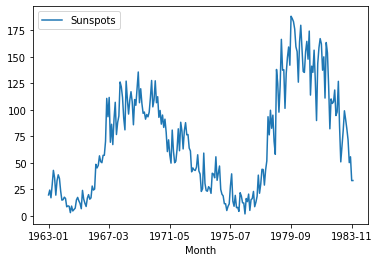

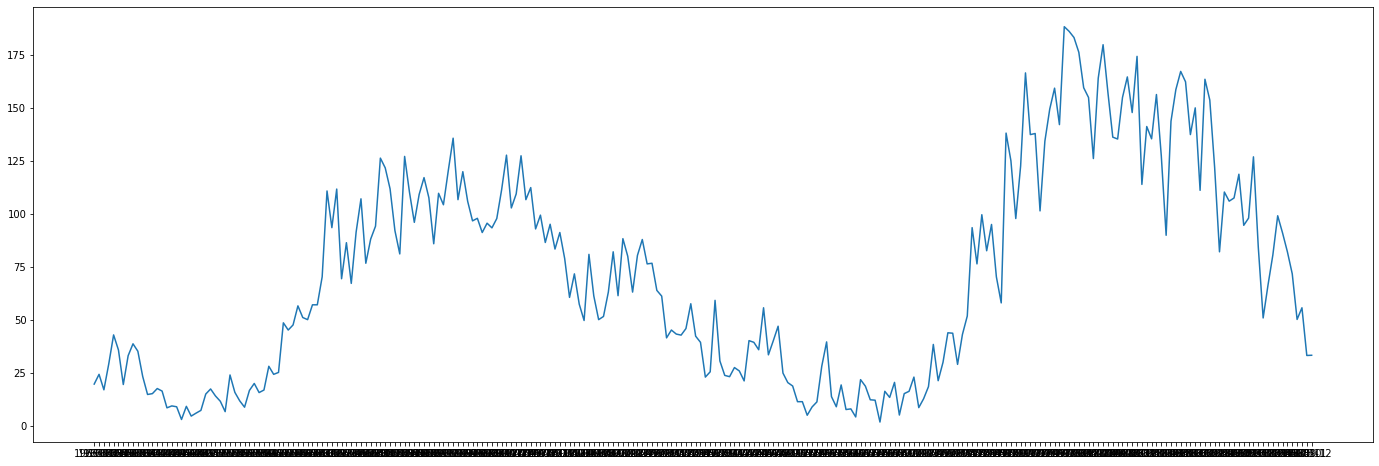

In [51]:
import matplotlib.pyplot as plt
series.plot()
plt.figure(figsize=(24,8))
plt.plot(series)

### 1.7   (2 puntos)

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.3 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

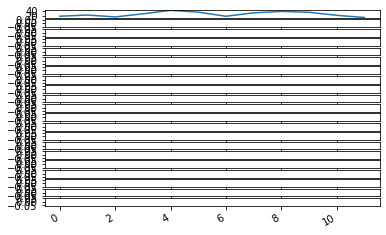

In [82]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html
groups = df.groupby(pd.Grouper(key="Date", freq = 'A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group["Sunspots"]
years.plot(subplots=True, legend=False)
plt.show()
    

### 1.8   (2 puntos)
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.9   (2 puntos)
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.10   (2 puntos)
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

### 1.11   (2 puntos)
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.12   (2 puntos)
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.13   (2 puntos)
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


# Parte 2.  Diferenciación

Se le suministra un archivo llamado monthly-robberies2.csv.  

### 2.1   (3 puntos)
- Cargue el archivo proporcionado y muestre los 4 primeros registros.

In [100]:
import pandas as pd
series = pd.read_csv("monthly-robberies2.csv", parse_dates=["Month"], header=0, index_col=0, squeeze=True)
print(type(series))
print(series.head(4))

<class 'pandas.core.series.Series'>
Month
1966-01-01    41
1966-02-01    39
1966-03-01    50
1966-04-01    40
Name: Robberies, dtype: int64


### 2.2   (3 puntos)

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

In [101]:
from statsmodels.tsa.stattools import adfuller
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


Dado que el p-value es mayor que el treshold del 5% se acepta la hipótesis nula, es decir, el conjunto de datos es **no estacionario** por lo que tiene algún tipo de estructura tiempo-dependiente

### 2.3   (3 puntos)

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

Gráfico de los meses con su diferencia al año anterior


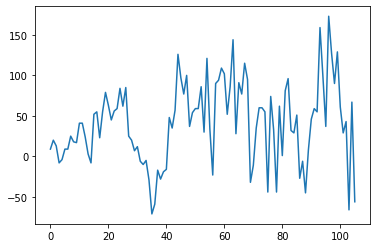

ADF Statistic: -2.288406
p-value: 0.175734
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
resampled = series.resample('M')
monthly_mean = resampled.mean()
X = series.values
diff = list()
dates = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
diff = pd.Series(diff)  # castea a series la lista
print("Gráfico de los meses con su diferencia al año anterior")
diff.plot()
plt.show()

X = diff.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

Dado a que el valor de *ADF Statistic* es mayor al -2.894 del 5% se acepta la hipótesis nula, por lo cual es **no estacionaria**

### 2.4   (3 puntos)

- En un mismo gráfico de líneas, presente la serie original (en azul) y la serie diferenciada (en rojo).

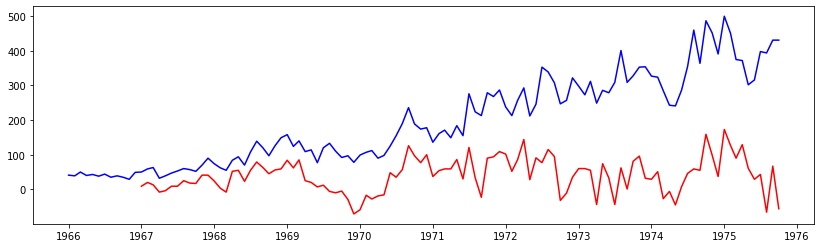

In [135]:
ls = list()  # nueva lista para almacenar las fechas 
indexes = series.index.tolist()  # crea una lista con los Timestamps de los indices
for i in range(12, len(indexes)):  # se salta los primeros 12 de los cuales no se sacó diferencia
    ls.append(pd.Timestamp(indexes[i]).date())

# crea una nueva serie para los valores de las diferencia y con los indices de su respectivo mes 
newSeries = pd.Series(diff.tolist(), index=ls, name="Diferences")

plt.figure(figsize=(14,4))
plt.plot(series, 'b')
plt.plot(newSeries, 'r')

### 2.5   (3 puntos)

- ¿Qué cambio nota de la serie antes de diferenciar a la serie diferenciada?


In [ ]:
Se elimina la tendencia, pero se conservan los patrones de los datos.

# Parte 3.  Regresión lineal y breve diseño experimental

Se le suministra un archivo llamado datos_practica2.csv.  

### 3.1    (5 puntos)
- Cargue el archivo.
- Muestre cuántas filas y cuántas columnas tiene el conjunto de datos.


### 3.2 (5 puntos)
- Divida entre X e y.
- Escale X utilizando MinMaxScaler. 
- Agregue la columna de bias (llena de 1's).
- Muestre los tres primeros registros.

### 3.3 (5 puntos)
- Divida entre train y test (tanto X como y).
- Utilice 70% train y 30% test, modo aleatorio.


### 3.4 (5 puntos)
- Considere el modelo $X_{train} *  w = y_{test}$
- Utilice X_train y y_train para encontrar el vector de pesos $w$ utilizando el concepto de mínimos cuadrados $\left(A^{T}A\right)^{-1}A^{T}\vec{b}$

**Nota:** En este punto la idea es usar multiplicación de matrices (álgebra lineal).


### 3.5 (5 puntos)

- Calcule un $y_{pred}$ utilizando $X_{test}$ y $w$.
- Calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$
- ¿Qué puede decir de los resultados obtenidos?

### 3.6 (5 puntos)

- Vamos ahora a utilizar sklearn para calcular los pesos.
- Utilizando from sklearn.linear_model import LinearRegression, y la división anterior en train y test. Ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$. 
- ¿Qué puede decir de los resultados obtenidos comparados con los obtenidos en 3.5?


### 3.7 (5 puntos)

- En esta parte vamos a probar los conceptos de  tran/validation/test y cross-validation.
- Usando KFold y Ridge, prepare un diseño experimental con 60% train, 20% validation y 20% test (distribución de manera aleatoria), con 10 folds. 
- La idea es encontrar el mejor valor para el hiperparámetro alfa en el modelo (factor de regularización).
- Muestre los resultados obtenidos y coméntelos (mismas métricas $R2$ y $MSE$ ).


___

# Parte 4  -  Temas por grupo  (25 puntos)
___

Considere lo siguiente:
1. Revise en el archivo PDF: "Temas por grupo", qué cuadernos jupyter le corresponden a su grupo.
1. Estudie los cuadernos asignados.
1. Prepare un único cuaderno de jupyter (comentando con celdas de texto en español), en que resume las técnicas asignadas, con ejemplos de código como en los cuadernos asignados.  Debe buscar uno o más datasets diferentes a los que se usan en los cuadernos de jupyter asignados.
1. Prepare un video para una posible presentación de sus temas en clase, no debe durar más 15 minutos en la presentación de los temas asignados (Considere que el material preparado será compartido con sus compañer(a/o)s del curso y por tanto se espera que se esmere en su elaboración y clara explicación -- por favor -- ).
1. Para esta Parte 4, adjunta:
    - Cuaderno de Jupyter generado.
    - Datasets necesarios para correr su cuaderno.
    - Video producido.